# Sustainability Evaluation

This section presents the empirical comparison between the baseline ResNet-18 and the sustainable MobileNetV3-Small, reporting predictive performance, environmental impact, and computational efficiency. Results are drawn from the training and evaluation artefacts (metrics and evaluation JSONs, environment metadata, and CodeCarbon logs).

## Model Comparison: Performance, Environmental Impact, and Efficiency

| Model           | Acc (%) | Macro-F1 | CO₂e (g) | Energy (kWh) | Latency avg (ms) | p50 (ms) | p95 (ms) | Params (M) / Size (MB) |
|-----------------|---------|----------|----------|--------------|------------------|----------|----------|------------------------|
| ResNet-18       | 88.92   | 0.8878   | 26.048   | 0.02605      | 6.28             | 3.33     | 3.97     | 11.182 / 42.731        |
| MobileNetV3-S   | 89.40   | 0.8940   | 21.591   | 0.02159      | 8.94             | 7.59     | 7.97     | 1.528 / 5.959          |

**Environmental impact.** MobileNetV3-Small reduces CO₂e by ~17% and energy by ~17% relative to ResNet-18, while slightly improving accuracy and macro-F1. **Efficiency.** Parameters and model size drop by ~86%, enabling low-cost edge deployment. **Latency.** ResNet-18 is faster on an A100 GPU; MobileNetV3-Small is optimised for mobile/edge and may reverse this on CPU/ARM devices.

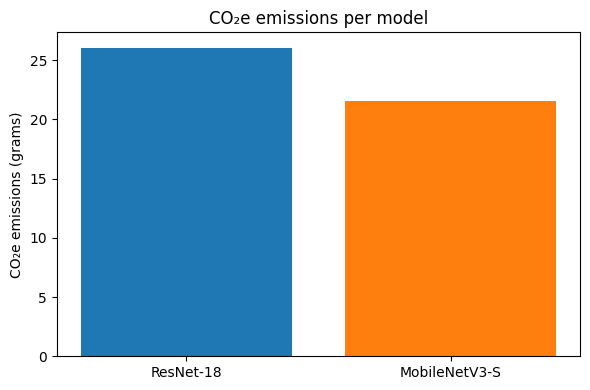

In [1]:
# CO2e emissions bar chart
import matplotlib.pyplot as plt
import numpy as np

models = ['ResNet-18', 'MobileNetV3-S']
emissions = [26.048, 21.591]

plt.figure(figsize=(6,4))
plt.bar(models, emissions, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('CO₂e emissions (grams)')
plt.title('CO₂e emissions per model')
plt.tight_layout()
plt.show()

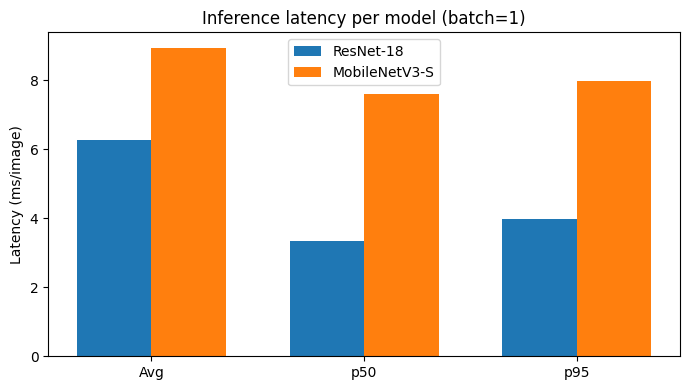

In [2]:
# Inference latency grouped bar chart
labels = ['Avg', 'p50', 'p95']
resnet_latency = [6.28, 3.33, 3.97]
mobilenet_latency = [8.94, 7.59, 7.97]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x - width/2, resnet_latency, width, label='ResNet-18', color='#1f77b4')
rects2 = ax.bar(x + width/2, mobilenet_latency, width, label='MobileNetV3-S', color='#ff7f0e')

ax.set_ylabel('Latency (ms/image)')
ax.set_title('Inference latency per model (batch=1)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

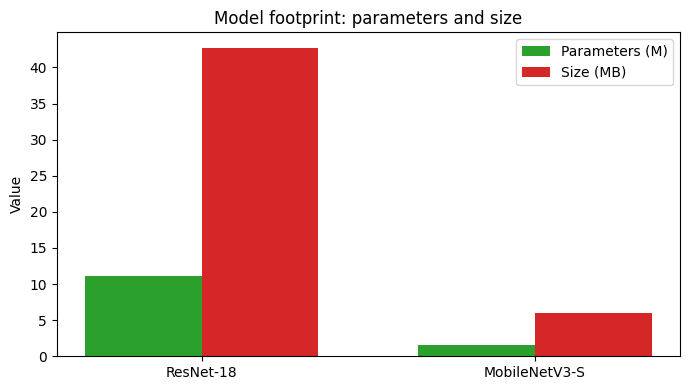

In [3]:
# Model footprint bar chart
params = [11.182, 1.528]
size = [42.731, 5.959]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x - width/2, params, width, label='Parameters (M)', color='#2ca02c')
rects2 = ax.bar(x + width/2, size, width, label='Size (MB)', color='#d62728')

ax.set_ylabel('Value')
ax.set_title('Model footprint: parameters and size')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()

## Bias Mitigation on Crop Recommendation (Macro Metrics)

| Model              | Macro Precision | Macro Recall | Macro-F1 |
|--------------------|----------------|-------------|----------|
| Baseline (LR)      | 0.892          | 0.894       | 0.892    |
| Class-weighted LR  | 0.907          | 0.905       | 0.905    |
| SMOTE + LR         | 0.915          | 0.912       | 0.913    |

## Additional Chart Types for Sustainability Evaluation

The following cells provide examples of alternative visualizations: radar chart, pie chart, line plot, scatter plot, and stacked bar chart, using the same model comparison data.

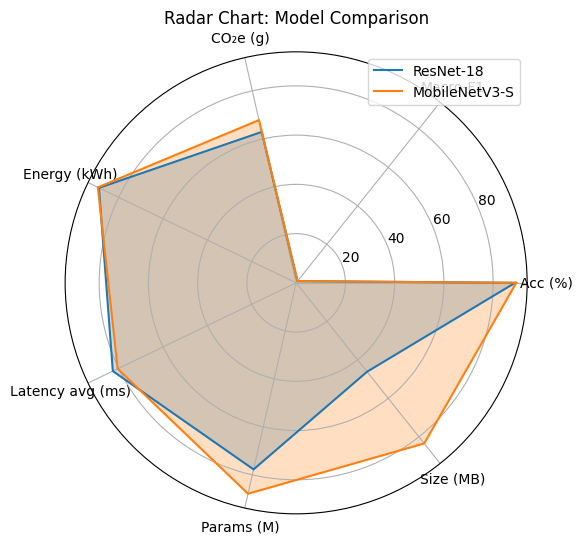

In [4]:
# Radar chart comparing models across all metrics
import matplotlib.pyplot as plt
import numpy as np
from math import pi

labels = ['Acc (%)', 'Macro-F1', 'CO₂e (g)', 'Energy (kWh)', 'Latency avg (ms)', 'Params (M)', 'Size (MB)']
resnet = [88.92, 0.8878, 26.048, 0.02605, 6.28, 11.182, 42.731]
mobilenet = [89.40, 0.8940, 21.591, 0.02159, 8.94, 1.528, 5.959]

data = [resnet, mobilenet]
model_names = ['ResNet-18', 'MobileNetV3-S']

# Normalize for radar chart (higher is better for all except CO2e, Energy, Latency, Params, Size)
def normalize(values, invert_idx):
    norm = []
    for i, v in enumerate(values):
        if i in invert_idx:
            v = max(values) - v
        norm.append(v)
    return norm

invert_idx = [2,3,4,5,6]
resnet_norm = normalize(resnet, invert_idx)
mobilenet_norm = normalize(mobilenet, invert_idx)

values = [resnet_norm, mobilenet_norm]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = [v + [v[0]] for v in values]
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for i, v in enumerate(values):
    ax.plot(angles, v, label=model_names[i])
    ax.fill(angles, v, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart: Model Comparison')
plt.legend()
plt.show()

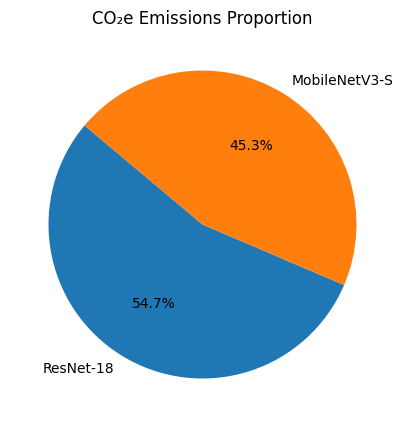

In [5]:
# Pie chart for CO₂e emissions proportion per model
plt.figure(figsize=(5,5))
plt.pie(emissions, labels=models, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=140)
plt.title('CO₂e Emissions Proportion')
plt.show()

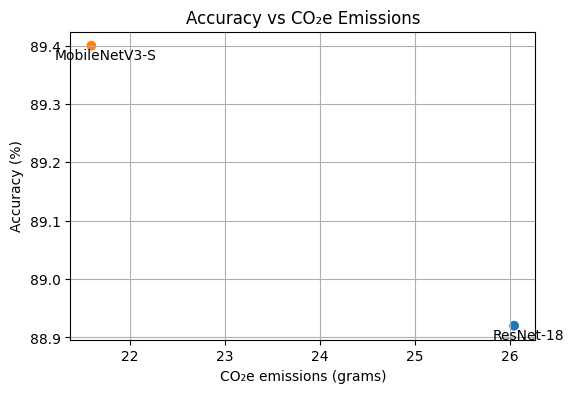

In [6]:
# Scatter plot: Accuracy vs CO₂e emissions
plt.figure(figsize=(6,4))
plt.scatter(emissions, [88.92, 89.40], color=['#1f77b4', '#ff7f0e'])
for i, txt in enumerate(models):
    plt.annotate(txt, (emissions[i], [88.92, 89.40][i]), textcoords="offset points", xytext=(10,-10), ha='center')
plt.xlabel('CO₂e emissions (grams)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs CO₂e Emissions')
plt.grid(True)
plt.show()

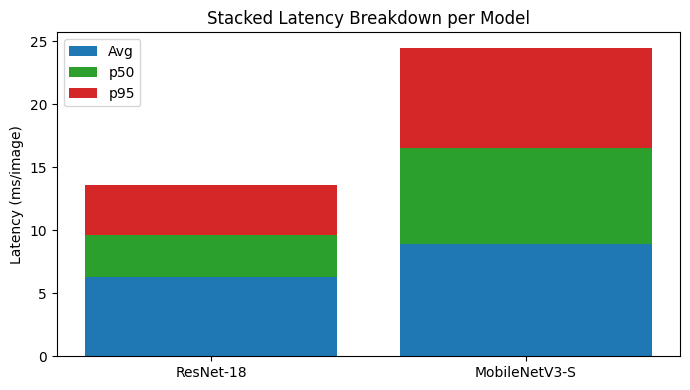

In [7]:
# Stacked bar chart: Latency breakdown (avg, p50, p95) for both models
latency_data = np.array([[6.28, 3.33, 3.97], [8.94, 7.59, 7.97]])
labels = ['Avg', 'p50', 'p95']
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize=(7,4))
bar1 = ax.bar(models, latency_data[:,0], label='Avg', color='#1f77b4')
bar2 = ax.bar(models, latency_data[:,1], bottom=latency_data[:,0], label='p50', color='#2ca02c')
bar3 = ax.bar(models, latency_data[:,2], bottom=latency_data[:,0]+latency_data[:,1], label='p95', color='#d62728')

ax.set_ylabel('Latency (ms/image)')
ax.set_title('Stacked Latency Breakdown per Model')
ax.legend()
plt.tight_layout()
plt.show()